In [7]:
import pandas as pd

def load_df(csv_path, toxic_threshold=-0.95):
    try:
        # Load the CSV into a DataFrame
        df = pd.read_csv(csv_path)
        print(df.head())
        df['toxic'] = df['sentiment'] < toxic_threshold
        return df
    except FileNotFoundError:
        print(f"File not found: {csv_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

old_vaccines = load_df('./old_vaccines_10000_20241209_180209.csv')
new_vaccines = load_df('./datasets/vaccines_10000_20241128_012151.csv')

                                                 uri  \
0  at://did:plc:xku5qkj7fgy3goitmoj7wmbx/app.bsky...   
1  at://did:plc:pgoy72te6bzh3psrdra3q7ya/app.bsky...   
2  at://did:plc:pr4k6zapfsljch4yscluksaz/app.bsky...   
3  at://did:plc:qg4kbleehhnew6c47kxkxjq2/app.bsky...   
4  at://did:plc:tbgvesi5cenpgexposw4hxd4/app.bsky...   

                                                text  \
0  No liability assumed!  Please do not use to pr...   
1  Open consultation on possible changes to the M...   
2  melhor.\n\nhttps://www.reuters.com/article/hea...   
3  1st dose efficacy of the two first mRNA vaccin...   
4  "provision of free vaccination"\n\nThe provisi...   

                        handle labels  like_count  quote_count  repost_count  \
0        weinzierl.bsky.social     []           0            0             0   
1  friendlymicrobe.bsky.social     []           0            0             0   
2            atila.bsky.social     []           0            0             0   
3     

In [8]:
old_vaccines.head()

,uri,text,handle,labels,like_count,quote_count,repost_count,sentiment,toxic
0,at://did:plc:xku5qkj7fgy3goitmoj7wmbx/app.bsky...,No liability assumed! Please do not use to pr...,weinzierl.bsky.social,[],0,0,0,-0.1280,False
1,at://did:plc:pgoy72te6bzh3psrdra3q7ya/app.bsky...,Open consultation on possible changes to the M...,friendlymicrobe.bsky.social,[],0,0,0,0.1779,False
2,at://did:plc:pr4k6zapfsljch4yscluksaz/app.bsky...,melhor.\n\nhttps://www.reuters.com/article/hea...,atila.bsky.social,[],0,0,0,0.0000,False
3,at://did:plc:qg4kbleehhnew6c47kxkxjq2/app.bsky...,1st dose efficacy of the two first mRNA vaccin...,oldtweets.xop.co,[],0,0,0,-0.5994,False
4,at://did:plc:tbgvesi5cenpgexposw4hxd4/app.bsky...,"""provision of free vaccination""\n\nThe provisi...",tweet.lucidillusions.in,[],0,0,0,0.6145,False


In [9]:
new_vaccines.head()

,uri,text,handle,labels,like_count,quote_count,repost_count,sentiment,toxic
0,at://did:plc:g6v6mlluhkaon6adnjokjnrw/app.bsky...,like do NOT get this guy going on vaccines,fabfourloko.bsky.social,[],0,0,0,0.3612,False
1,at://did:plc:cwvkinipwxa2mme2owbb4j57/app.bsky...,A thread 🧵 1/4\n\nAnthony Fauci called RFK Jr....,xhandler.bsky.social,[],0,0,0,0.0000,False
2,at://did:plc:7fjae5aawatnt5e4hyldxsyn/app.bsky...,🚛❄️ #RefrigeratedTransport Market: Driving Glo...,abhiksi.bsky.social,[],1,0,0,0.4910,False
3,at://did:plc:mpdezz4nkre7vyift2rttggl/app.bsky...,"oh, another big question is how to handle comm...",tachikoma.elsewhereunbound.com,[],0,0,0,-0.6486,False
4,at://did:plc:brelqoraumjfxnsbkbc4df56/app.bsky...,the far left and far right both exhibit such p...,capitalist.bsky.social,[],0,0,0,-0.2500,False


In [11]:
summary_old = old_vaccines.describe().transpose()
summary_old

,count,mean,std,min,25%,50%,75%,max
like_count,6259.0,0.029078,0.199355,0.0000,0.00,0.0,0.0000,5.0000
quote_count,6259.0,0.014379,0.141165,0.0000,0.00,0.0,0.0000,4.0000
repost_count,6259.0,0.002716,0.060563,0.0000,0.00,0.0,0.0000,2.0000
sentiment,6259.0,0.081925,0.475381,-0.9763,-0.25,0.0,0.4588,0.9833


In [ ]:
summary_new = new_vaccines.describe().transpose()
summary_new

In [17]:
print(len(old_vaccines['like_count'].unique()))

6


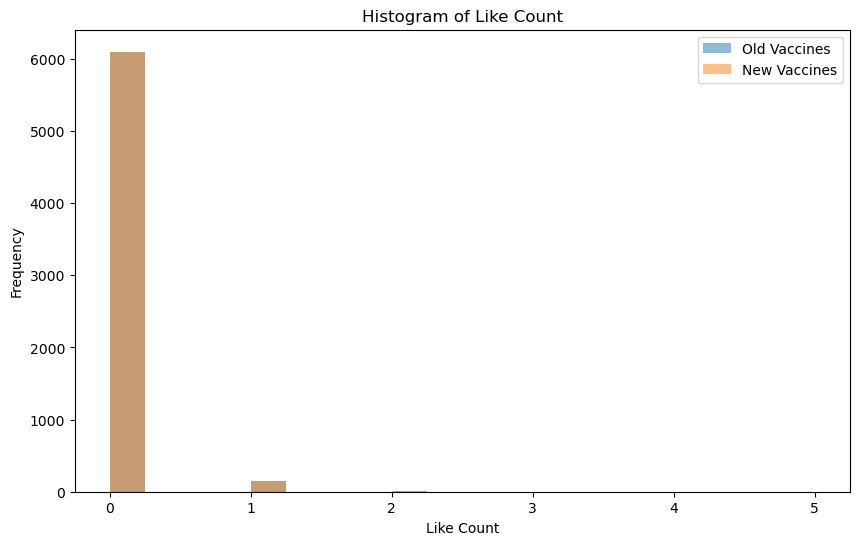

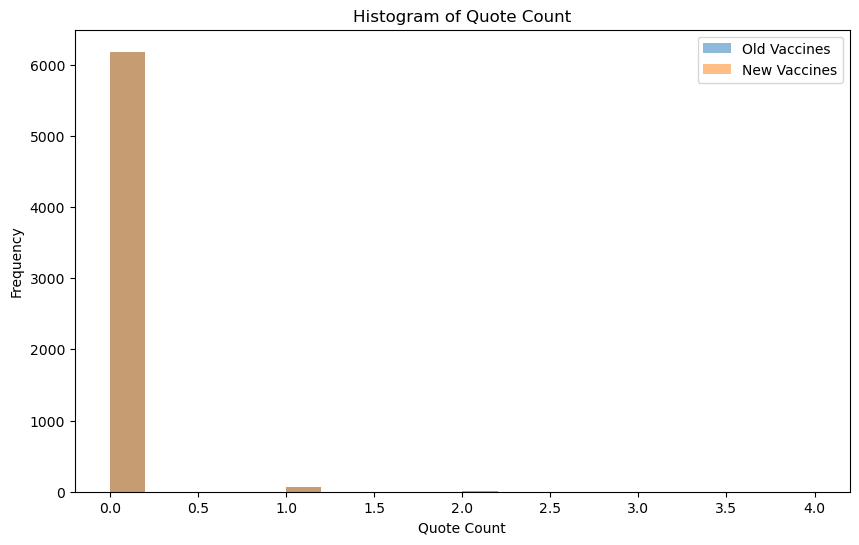

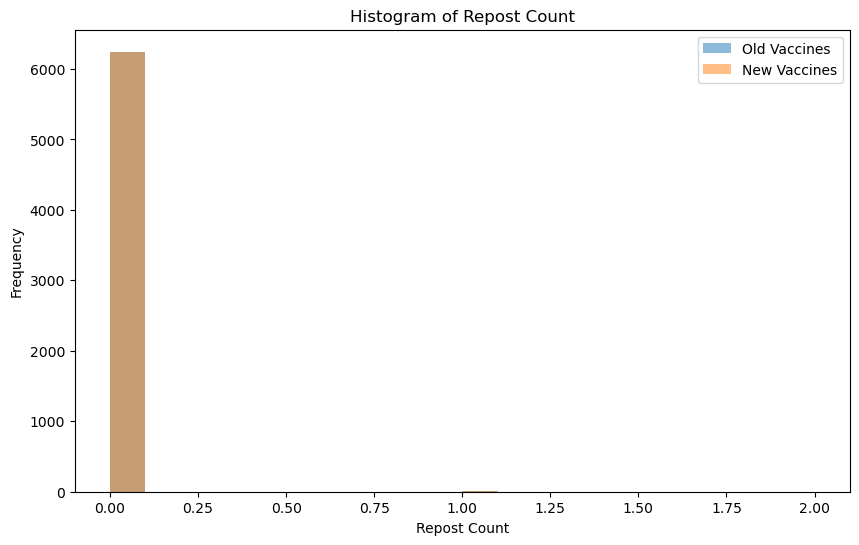

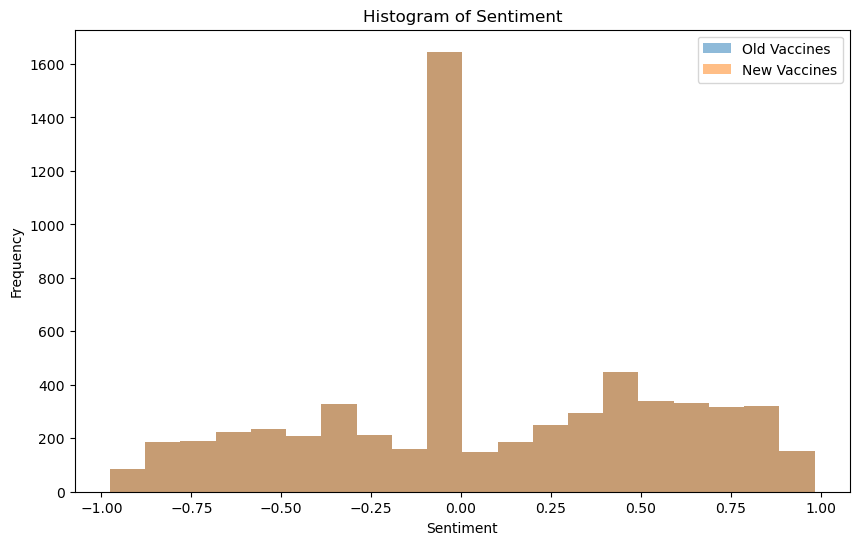

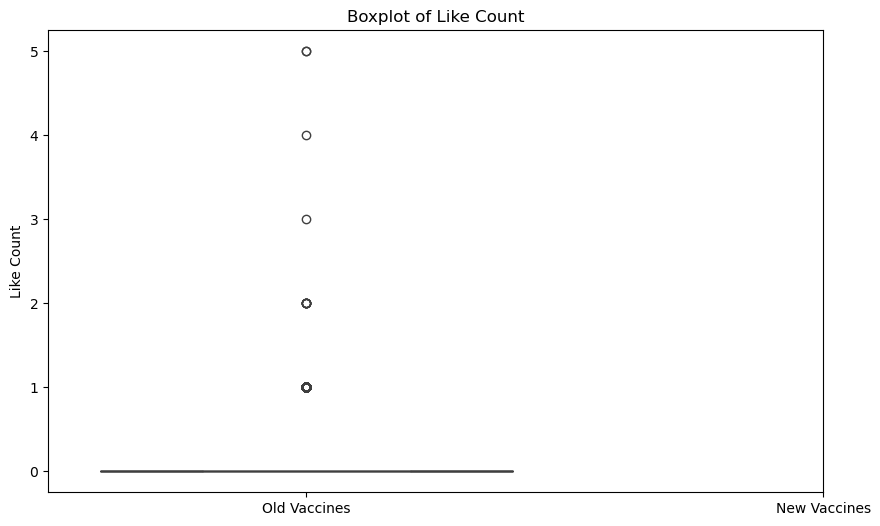

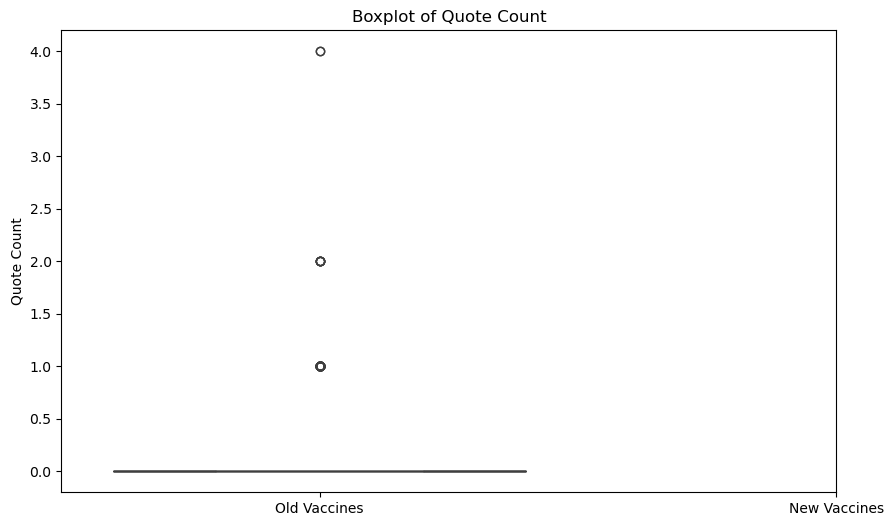

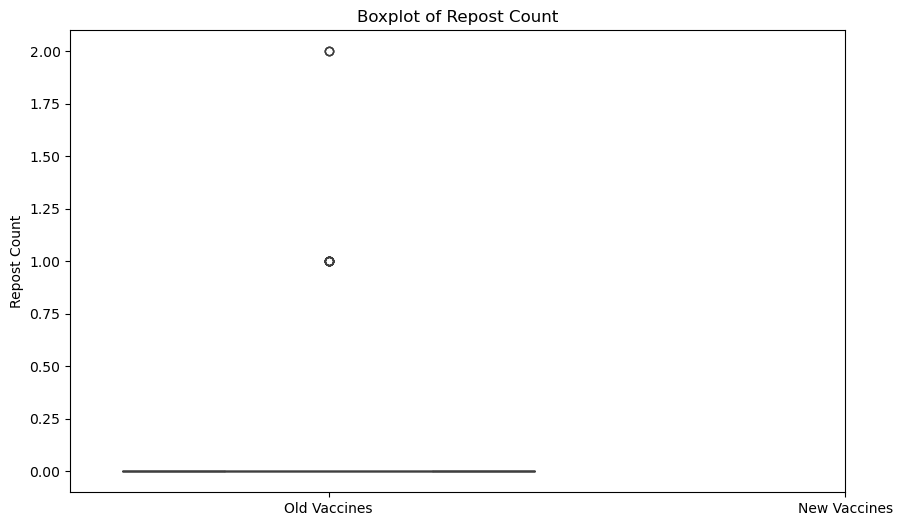

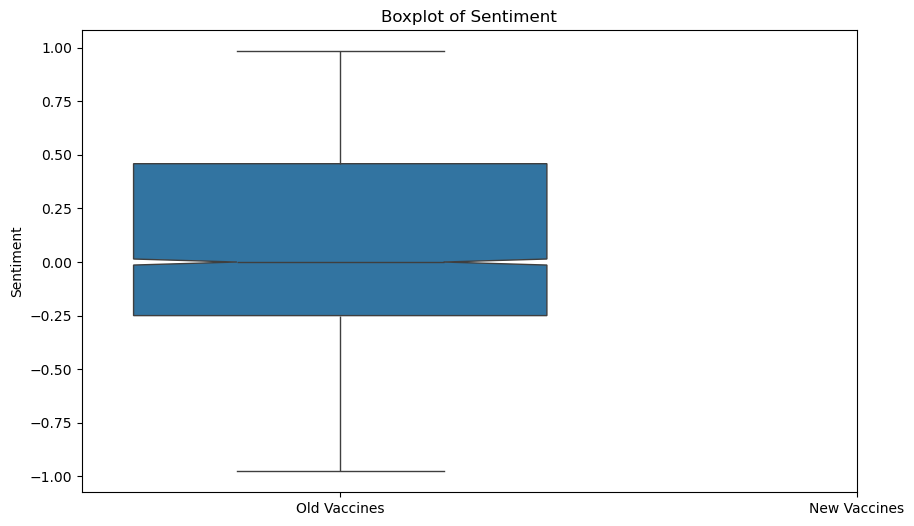

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ["like_count", "quote_count", "repost_count", "sentiment"]
# Simplify visualization by plotting histograms and removing KDE plot complexities
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.hist(old_vaccines[metric].dropna(), bins=20, alpha=0.5, label="Old Vaccines")
    plt.hist(new_vaccines[metric].dropna(), bins=20, alpha=0.5, label="New Vaccines")
    plt.title(f"Histogram of {metric.replace('_', ' ').title()}")
    plt.xlabel(metric.replace('_', ' ').title())
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Retry box plots for visual comparison
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=[old_vaccines[metric].dropna(), new_vaccines[metric].dropna()], notch=True)
    plt.xticks([0, 1], ['Old Vaccines', 'New Vaccines'])
    plt.title(f"Boxplot of {metric.replace('_', ' ').title()}")
    plt.ylabel(metric.replace('_', ' ').title())
    plt.show()


In [ ]:
#

Gave up on DiD study here when I realized literally NO ONE was using bluesky before April 2023.